# AIM: EDA ALONG WITH PREDICTING THE AGE.  

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('C:/Users/me/Desktop/pyt/kaggle/body measurement/Body Measurements _ original_CSV.csv')

## EXPLORING THE DATA

In [3]:
data.head().T

,0,1,2,3,4
Gender,1.0,1.0,2.0,1.0,2.0
Age,30.0,28.0,27.0,29.0,28.0
HeadCircumference,22.0,19.0,21.0,20.0,16.0
ShoulderWidth,18.0,22.0,18.0,20.0,14.0
ChestWidth,20.0,17.0,16.0,18.0,18.0
Belly,18.0,18.0,14.0,11.0,13.0
Waist,14.0,21.0,10.0,19.0,11.0
Hips,22.0,25.0,15.0,14.0,30.0
ArmLength,22.0,28.0,21.0,24.0,25.0
ShoulderToWaist,25.0,23.0,18.0,21.0,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
Gender               715 non-null float64
Age                  716 non-null int64
HeadCircumference    716 non-null int64
ShoulderWidth        716 non-null int64
ChestWidth           716 non-null int64
Belly                716 non-null int64
Waist                716 non-null int64
Hips                 716 non-null int64
ArmLength            716 non-null int64
ShoulderToWaist      716 non-null int64
WaistToKnee          716 non-null int64
LegLength            716 non-null int64
TotalHeight          716 non-null int64
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


The 'GENDER' column has only one null value, so, we can remove it.

First, we'll try to fine the row number of the Null Value.

## Dealing with missing data

In [5]:
def count_missing_value(data):
    null_count = data.isnull().sum()
    nan_count = ((data== 'nan') | (data=='NaN') | (data=='Nan')).sum()
    empty_count = ((data== ' ') | (data=='')).sum()
    abc = pd.DataFrame({
        'null_count' : null_count,
        'nan_count' : nan_count,
        'empty_count' : empty_count
     })
    
    return abc
count_missing_value(data)

,null_count,nan_count,empty_count
Gender,1,0,0
Age,0,0,0
HeadCircumference,0,0,0
ShoulderWidth,0,0,0
ChestWidth,0,0,0
Belly,0,0,0
Waist,0,0,0
Hips,0,0,0
ArmLength,0,0,0
ShoulderToWaist,0,0,0


###  Finding the location of empty value

In [6]:
location= data.loc[data.Gender.isnull()]    
print('The empty row is : \n')
location

The empty row is : 



,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
536,NaN,9,20,13,11,21,24,11,22,14,15,25,44


### Removing the row with empty value.

In [7]:
data2= data.drop(labels=[536] ,axis=0)     
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 715
Data columns (total 13 columns):
Gender               715 non-null float64
Age                  715 non-null int64
HeadCircumference    715 non-null int64
ShoulderWidth        715 non-null int64
ChestWidth           715 non-null int64
Belly                715 non-null int64
Waist                715 non-null int64
Hips                 715 non-null int64
ArmLength            715 non-null int64
ShoulderToWaist      715 non-null int64
WaistToKnee          715 non-null int64
LegLength            715 non-null int64
TotalHeight          715 non-null int64
dtypes: float64(1), int64(12)
memory usage: 78.2 KB


### Re-checking for missing values.

In [8]:
count_missing_value(data2)

,null_count,nan_count,empty_count
Gender,0,0,0
Age,0,0,0
HeadCircumference,0,0,0
ShoulderWidth,0,0,0
ChestWidth,0,0,0
Belly,0,0,0
Waist,0,0,0
Hips,0,0,0
ArmLength,0,0,0
ShoulderToWaist,0,0,0


The empty value has been removed from the data.


In [9]:
data2['Gender'].value_counts()

1.0    391
2.0    324
Name: Gender, dtype: int64

In [10]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,715.0,1.453147,0.498148,1.0,1.0,1.0,2.0,2.0
Age,715.0,15.349650,11.837401,1.0,7.0,11.0,21.0,68.0
HeadCircumference,715.0,20.574825,3.745912,5.0,19.0,20.0,22.0,80.0
ShoulderWidth,715.0,14.318881,4.765259,4.0,11.0,14.0,18.0,87.0
ChestWidth,715.0,14.574825,5.316686,6.0,11.0,13.0,17.0,38.0
Belly,715.0,20.198601,10.140042,5.0,15.0,20.0,23.0,213.0
Waist,715.0,19.258741,8.775055,2.0,12.0,20.0,23.0,91.0
Hips,715.0,19.390210,8.745718,7.0,12.0,18.0,24.0,63.0
ArmLength,715.0,18.812587,5.379035,6.0,16.0,19.0,22.0,66.0
ShoulderToWaist,715.0,17.906294,5.381096,1.0,13.0,18.0,22.0,39.0


## DATA VISUALISATION

## PLOT 1

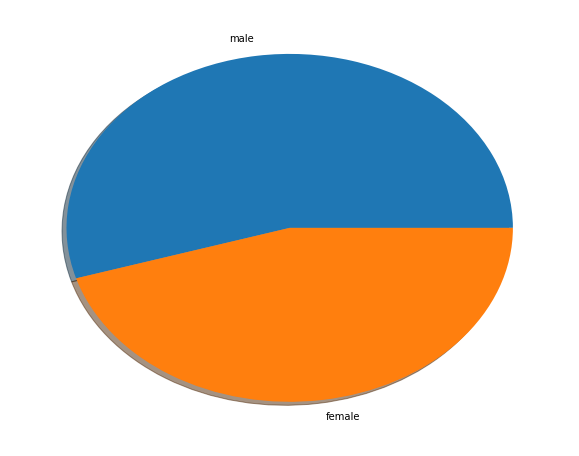

In [11]:
label = ['male', 'female']
fig= plt.subplots(figsize=(10,8))
plt.pie(data2.Gender.value_counts(), labels= label, shadow= True)
plt.show()

### Making variables required for plotting. 

In [12]:
female= data2[data2['Gender']==2]
male= data2[data2['Gender']==1]

In [13]:
f_ShoulderWidth_mean = round(female['ShoulderWidth'].mean(), 0)
m_ShoulderWidth_mean = round(male['ShoulderWidth'].mean(), 0)

f_TotalHeight_mean = round(female['TotalHeight'].mean(), 0)
m_TotalHeight_mean = round(male['TotalHeight'].mean(), 0)

f_above_avg_height = female[female['TotalHeight']>=f_TotalHeight_mean].TotalHeight
f_below_avg_height = female[female['TotalHeight']<f_TotalHeight_mean].TotalHeight
m_above_avg_height = male[male['TotalHeight']>=m_TotalHeight_mean].TotalHeight
m_below_avg_height = male[male['TotalHeight']<m_TotalHeight_mean].TotalHeight

## PLOT 2

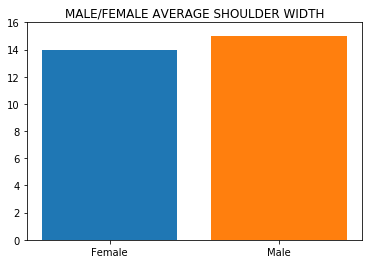

In [100]:
plt.bar('Female', f_ShoulderWidth_mean,bottom=None)
plt.bar('Male', m_ShoulderWidth_mean)
plt.title('MALE/FEMALE AVERAGE SHOULDER WIDTH')
plt.ylim(0,16)
plt.show()

## PLOT 3

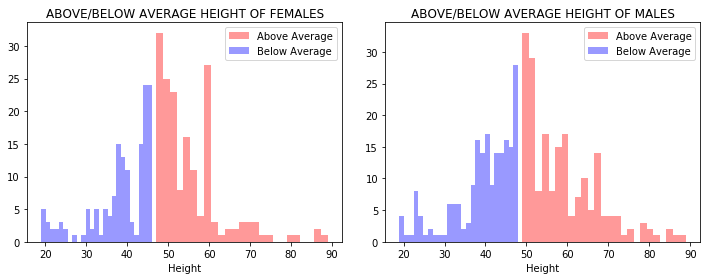

In [15]:
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(10,4))

sns.distplot(f_above_avg_height, label='Above Average', kde= False, bins= 25, ax=ax1,color='r')
sns.distplot(f_below_avg_height, label='Below Average', kde= False, bins= 25, ax=ax1,color='b')
sns.distplot(m_above_avg_height, label='Above Average', kde= False, bins= 25, ax= ax2, color='r')
sns.distplot(m_below_avg_height, label='Below Average', kde= False, bins= 25, ax= ax2, color='b')

ax1.set(title='ABOVE/BELOW AVERAGE HEIGHT OF FEMALES', xlabel= "Height")
ax1.legend()
ax2.set(title='ABOVE/BELOW AVERAGE HEIGHT OF MALES', xlabel= "Height")
ax2.legend()

plt.tight_layout()
plt.show()

From the above distribution plot, we can interpret that more than 50% of the Males & Females have ABOVE average height. 

One thing to note is that, maximum number of Males/Females are in the VICINITY OF THE AVERAGE HEIGHT.

## PLOT 4

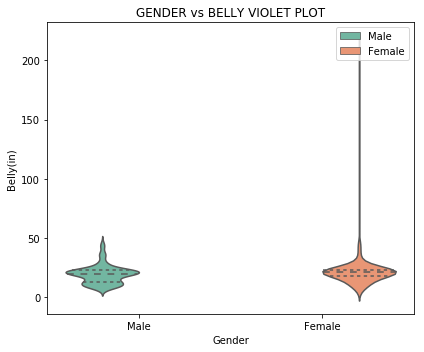

In [200]:
gender=['Male' if i==1.0 else 'Female' for i in data2.Gender]

fig,ax= plt.subplots(figsize=(6,5))
ax= sns.violinplot(x=gender, y=data2['Belly '] , palette="Set2", inner="quartile", hue=gender)

ax.set(title= 'GENDER vs BELLY VIOLET PLOT', xlabel='Gender', ylabel='Belly(in)')
plt.tight_layout()
plt.show()

Here, we can see the belly of Males is majorly between 13-35, and same goes for Females too. 

But, we can notice a 200+inch belly, which is clearly an outlier.

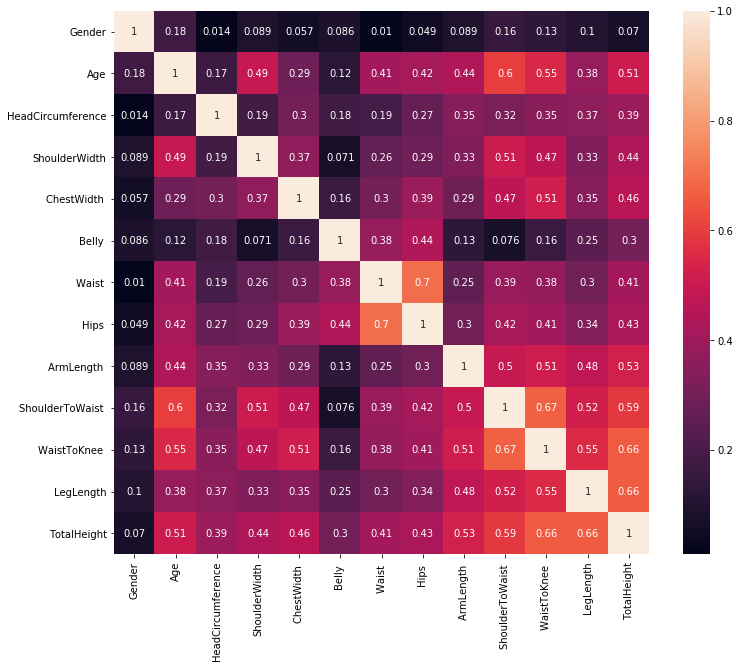

In [98]:
plt.figure(figsize=(12, 10))
sns.heatmap(data2.corr().abs(), annot= True)
plt.show()

In [99]:
x= data2.drop(['Gender', 'Age', 'Belly '], axis=1)
y=data2['Age']

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.3, random_state=0)

Removing the less correlated columns to make a cleaner dataset for a precise prediction.

## REGRESSOR vs CLASSIFIER

### a) KNN

In [125]:
knn_scores= []

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

for i in np.arange(1,15,3):
    
    #knn classifier
    c_knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    c_train_knn = c_knn.fit(x_train, y_train)
    c_knn_ypred = c_train_knn.predict(x_test)
    c_accuracy = accuracy_score(y_test, c_knn_ypred)
    c_accuracy_percentage = c_accuracy * 100 
    
    #knn regressor
    r_knn= KNeighborsRegressor(n_neighbors=i)
    r_train_knn= r_knn.fit(x_train, y_train)
    r_knn_ypred = r_train_knn.predict(x_test)
    r_accuracy= mean_squared_error(y_test, r_knn_ypred)
    
    knn_scores.append(pd.Series({'n_neighbour' : i,
                                'knn regressor' : r_accuracy,
                                'knn classifier' : c_accuracy_percentage
                                }))
knn_score = pd.concat(knn_scores, axis=1).T.set_index('n_neighbour')    

In [126]:
knn_score

,knn regressor,knn classifier
n_neighbour,,
1.0,51.065116,27.906977
4.0,44.645930,28.837209
7.0,39.557380,27.906977
10.0,37.370837,28.372093
13.0,38.765570,26.046512


Neither of them gives a satisfactory results.

But, Regressor performs better than Classifier.

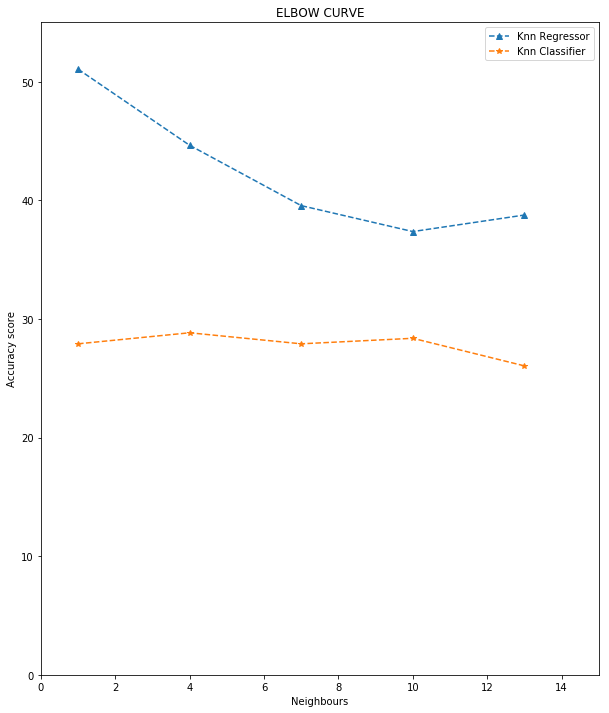

In [120]:
fig, ax = plt.subplots(figsize=(10,12))
ax.plot(knn_score.index, knn_score['knn regressor'], label= 'Knn Regressor', marker= '^', ls= '--')
ax.plot(knn_score.index, knn_score['knn classifier'], label= 'Knn Classifier', marker= '*', ls= '--')
ax.legend()
ax.set(title='ELBOW CURVE' , xlim=(0,15), ylim=(0,55), xlabel= 'Neighbours', ylabel= 'Accuracy score')
plt.show()

### b) RANDOM FOREST 

In [188]:
rf_scores= []

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

for i in [1,10,25,50,75,90,100,150,250,300,400,500]:
    for j in np.arange(1,5,1):
        #random forest regressor
        r_rf= RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j)
        r_rf_train = r_rf.fit(x_train,y_train)
        r_rf_ypred = r_rf_train.predict(x_test)
        r_rf_score = round(mean_squared_error(y_test, r_rf_ypred),2)

        #random forest classifier
        c_rf= RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j)
        c_rf_train = c_rf.fit(x_train,y_train)
        c_rf_ypred = c_rf_train.predict(x_test)
        c_rf_score = accuracy_score(y_test, c_rf_ypred)
        c_rf_score_percentage = round(c_rf_score*100,2)

        rf_scores.append(pd.Series({'n_estimator' : i,
                                    'max_depth' : j,
                                    'rf_regression_score': r_rf_score,
                                    'rf classification score': c_rf_score_percentage
                                   }))

In [189]:
rf_score = pd.concat(rf_scores, axis=1).T.set_index(['n_estimator','max_depth'])
rf_score

rf_regression_score  rf classification score
n_estimator max_depth                                              
1.0         1.0                      72.08                     7.91
            2.0                      63.46                    10.70
            3.0                      83.98                    13.02
            4.0                      72.90                    11.16
10.0        1.0                      66.53                     7.91
            2.0                      52.59                    11.63
            3.0                      48.60                    18.60
            4.0                      51.03                    20.47
25.0        1.0                      64.20                     8.37
            2.0                      50.49                    10.70
            3.0                      46.47                    16.28
            4.0                      43.92                    25.12
50.0        1.0                      64.60                     6.05
            2.0                      51.75                    11.16
            3.0                      45.75                    19.07
            4.0                      47.65                    21.86
75.0        1.0                      64.40                     9.30
            2.0                      52.76                    10.70
            3.0                      46.57                    19.07
            4.0                      44.05                    22.79
90.0        1.0                      64.67                     6.05
            2.0                      51.24                    10.23
            3.0                      46.86                    20.47
            4.0                      45.03                    23.26
100.0       1.0                      63.15                     8.37
            2.0                      52.04                    11.16
            3.0                      49.33                    16.74
            4.0                      43.95                    21.40
150.0       1.0                      63.89                     8.37
            2.0                      52.09                    12.09
            3.0                      47.38                    17.21
            4.0                      43.03                    20.00
250.0       1.0                      65.12                     8.37
            2.0                      51.37                    11.16
            3.0                      45.98                    19.53
            4.0                      43.19                    22.33
300.0       1.0                      64.95                     8.37
            2.0                      51.08                    11.63
            3.0                      45.64                    17.67
            4.0                      44.19                    20.00
400.0       1.0                      64.35                     8.37
            2.0                      50.90                    11.16
            3.0                      46.07                    16.28
            4.0                      44.13                    24.19
500.0       1.0                      65.11                     8.37
            2.0                      51.50                    11.16
            3.0                      46.22                    19.07
            4.0                      44.25                    21.86

In [199]:
print('BEST RESULT OF knn regressor : ',round(knn_score['knn regressor'].max(),2))
print('BEST RESULT OF knn classifier : ',round(knn_score['knn classifier'].max(),2))
print('BEST RESULT OF rf_regression_score : ', rf_score['rf_regression_score'].max())
print('BEST RESULT OF rf classification score : ', rf_score['rf classification score'].max())

BEST RESULT OF knn regressor :  51.07
BEST RESULT OF knn classifier :  28.84
BEST RESULT OF rf_regression_score :  83.98
BEST RESULT OF rf classification score :  25.12


Here, we can see RF REGRESSOR is far better than RF CLASSIFIER.

To get the best parameters, we can use GridSearchCV because it has in-built functions for it.

If you have any other options to find the best parameters please let me know. I'll really appreciate it!

# CONCLUSION

Among all the 4 algorithms used in this code, RANDOM FOREST REGRESSOR gives the best results with an accuracy of 83.98.

# IF YOU GAINED ANYTHING FROM THE CODE, DO UPVOTE IT!

# THANKS!